股指期货基差研究及相关策略

In [ ]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt

基差是某商品现货价格与期货价格之间的差额。当期货价格低于其对应的现货指数价格时，这种现象被称为贴水（backwardation）。

今年以来，中证500与中证1000股指期货的贴水幅度再次显著走阔进入深水区，其期限结构呈现为近低远高的反向市场形态。

这一现象不仅是市场情绪、对冲需求和资金结构的直观反映，也构成了一个非常有趣的现象：

从策略角度看，投资者似乎仅通过简单、持续地滚动持有贴水状态的期货合约，便可获得除了指数本身涨跌之外，由贴水收敛所带来的额外增强收益，这种策略一般被称为IC滚贴水。

In [ ]:
import pandas as pd
data = pd.read_csv('data/market_status.csv', index_col='Unnamed: 0')
data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data['near_delist_date'] = pd.to_datetime(data['near_delist_date'], format='%Y%m%d')
data['far_delist_date'] = pd.to_datetime(data['far_delist_date'], format='%Y%m%d')
print( f"2017年至今：")
print( f"近月IH平均年化基差率：{data['near_discount_ih'].mean():.2%}, 远月IH平均年化基差率：{data['far_discount_ih'].mean():.2%},")
print( f"近月IF平均年化基差率：{data['near_discount_if'].mean():.2%}, 远月IF平均年化基差率：{data['far_discount_if'].mean():.2%},")
print( f"近月IC平均年化基差率：{data['near_discount_ic'].mean():.2%}, 远月IC平均年化基差率：{data['far_discount_ic'].mean():.2%},")
print( f"今年以来：")
print( f"近月IH平均年化基差率：{data['near_discount_ih'].iloc[1699:].mean():.2%}, 远月IH平均年化基差率：{data['far_discount_ih'].iloc[1699:].mean():.2%},")
print( f"近月IF平均年化基差率：{data['near_discount_if'].iloc[1699:].mean():.2%}, 远月IF平均年化基差率：{data['far_discount_if'].iloc[1699:].mean():.2%},")
print( f"近月IC平均年化基差率：{data['near_discount_ic'].iloc[1699:].mean():.2%}, 远月IC平均年化基差率：{data['far_discount_ic'].iloc[1699:].mean():.2%},")

2017年至今：
近月IH平均年化基差率：-2.09%, 远月IH平均年化基差率：-0.86%,
近月IF平均年化基差率：-3.28%, 远月IF平均年化基差率：-1.60%,
近月IC平均年化基差率：-7.01%, 远月IC平均年化基差率：-4.83%,
今年以来：
近月IH平均年化基差率：-3.50%, 远月IH平均年化基差率：-1.31%,
近月IF平均年化基差率：-5.09%, 远月IF平均年化基差率：-2.65%,
近月IC平均年化基差率：-10.06%, 远月IC平均年化基差率：-6.26%,


Text(0.5, 1.0, 'Basis of stock index future, from 2025')

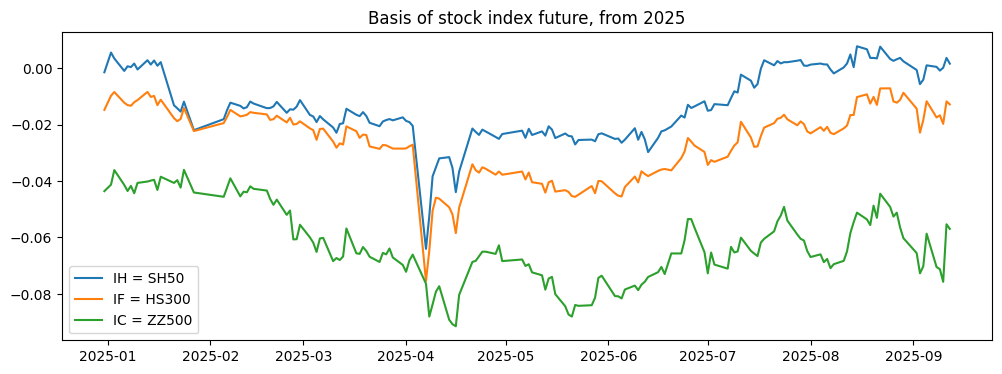

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
plt.plot(data['trade_date'].iloc[1699:], data['far_discount_ih'].iloc[1699:], label='IH = SH50')
plt.plot(data['trade_date'].iloc[1699:], data['far_discount_if'].iloc[1699:], label='IF = HS300')
plt.plot(data['trade_date'].iloc[1699:], data['far_discount_ic'].iloc[1699:], label='IC = ZZ500')
plt.legend()
plt.title('Basis of stock index future, from 2025')

根据期货定价公式 F = S * e^(r-q) * (T-t)，年化基差率应该受到无风险利率和成分股的股息率影响。

数据显示，上证50成分股的股息率平均在3%左右，沪深300的股息率也稳定在2-3%，基本与无风险利率水平相当。

然而，中证500指数的平均股息率仅为1.29%，显著低于大盘蓝筹股水平。

这一差距无法完全解释中证500股指期货（IC）以及中证1000股指期货（IM）长期深度贴水的现象。究其根本，贴水背后既有市场结构和制度性因素，也受到短期情绪的显著影响。

In [3]:
dividend = pd.read_csv('dividend_yield.csv')
print(f"平均股息率：上证50：{dividend['IH'].mean():.2f}%, 沪深300：{dividend['IF'].mean():.2f}%，中证500：{dividend['IC'].mean():.2f}%")

平均股息率：上证50：3.21%, 沪深300：2.45%，中证500：1.29%


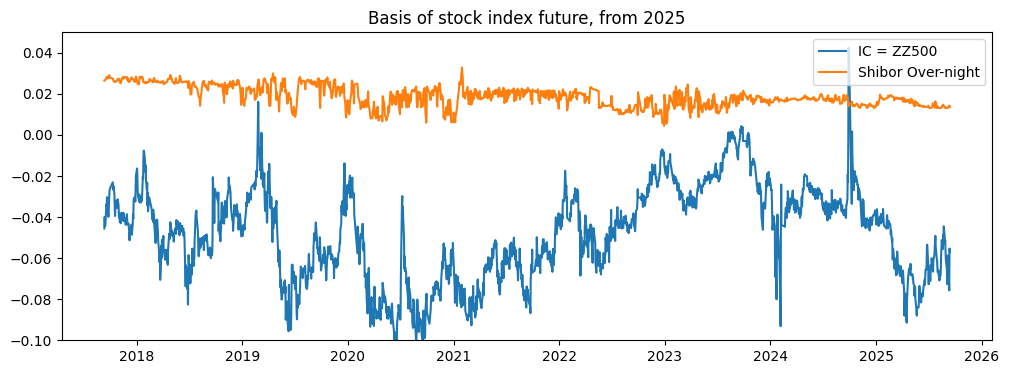

In [67]:
plt.figure(figsize = (12, 4))
plt.ylim((-0.1, 0.05))
plt.plot(data['trade_date'], data['far_discount_ic'], label='IC = ZZ500')
plt.plot(data['trade_date'], data['on']/100, label='Shibor Over-night')
plt.title('Basis of stock index future, from 2025')
plt.legend()

一、长期结构性因素：负Beta资产的渠道限制与中性策略的对冲成本

从资产定价理论出发，市场中性策略通常通过同时构建多空头寸来剥离市场系统性风险（Beta），以获取纯Alpha收益。

理想情况下，这类策略应通过融券卖空或转融通机制建立空头头寸。然而，在A股市场实践中，做空渠道受到严格限制。

融券券源不足、成本高昂，融券利息普遍介于6%–10%之间，再加上保证金所占用的资金成本，显著侵蚀了策略的整体收益。这一点在小盘股中尤为突出——其流动性更低、波动更大，做空难度与成本也更高。

因此，绝大多数市场中性策略、套期保值、T+0和高频量化基金转而使用股指期货作为核心对冲工具，尤其是中证500和中证1000合约。

即便期货处于贴水状态，使用股指期货进行对冲的综合成本仍远低于直接融券。反过来看，贴水实际成为中性策略为转移Beta风险而向对手方（即期货多头）支付的风险溢价。


从资金属性角度看，长期持有IC或IM合约并滚动换月，实际上构成了一种“被动增强型”策略：

投资者在享受指数本身潜在回报的同时，还能获得贴水收敛带来的额外收益（以及保证金以外部分资金的可投利息，无风险利率的70%）。

这一模式在一定程度上替代了传统的指数增强基金，形成跨市场套利机制：

因此，IC基差率的下限实质上受制于中性策略基金的Alpha能力——若贴水过度扩宽（即基差过大），中性策略将难以覆盖对冲成本，对冲资金便会寻求其他替代渠道。

IC基差率的上限则受制于指数增强基金的Alpha能力——若贴水过度收窄（即基差过小），一旦基差收窄，持有期货的增强收益下降，资金则会回流至主动型指增产品。

综上所述，中证500与中证1000期指期货基差率，其上限受到指数增强型基金市场平均Alpha收益获取能力的限制，下限受到中性策略基金市场平均Alpha收益获取能力的限制。

而市场平均Alpha主要受研究能力、市场有效性、波动率的影响，波动幅度很小。基差率的其他影响因素如利率等也同样如此。

在这样的双侧套利机制的保证下，期货的基差长期稳定在特定区间内，本身具有平稳性等良好的时间序列性质。

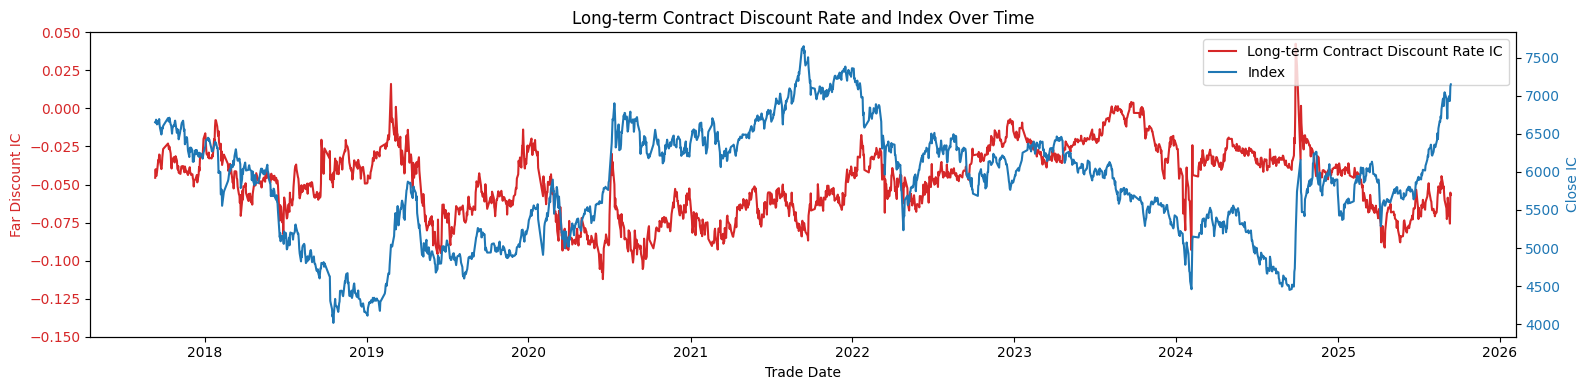

In [69]:
fig, ax1 = plt.subplots(figsize=(16, 4))
color_far = 'tab:red'
ax1.set_ylim((-0.15, 0.05))
ax1.set_xlabel('Trade Date')
ax1.set_ylabel('Far Discount IC', color=color_far)
line_far = ax1.plot(data['trade_date'], data['far_discount_ic'], color=color_far, label='Long-term Contract Discount Rate IC')
ax1.tick_params(axis='y', labelcolor=color_far)
ax2 = ax1.twinx()
color_close = 'tab:blue'
ax2.set_ylabel('Close IC', color=color_close)
line_close = ax2.plot(data['trade_date'], data['close_ic'], color=color_close, label='Index')
ax2.tick_params(axis='y', labelcolor=color_close)

lines_from_ax1, labels_from_ax1 = ax1.get_legend_handles_labels()
lines_from_ax2, labels_from_ax2 = ax2.get_legend_handles_labels()
ax1.legend(lines_from_ax1 + lines_from_ax2, labels_from_ax1 + labels_from_ax2, loc='upper right')
plt.title('Long-term Contract Discount Rate and Index Over Time')
fig.tight_layout()
plt.show()

二、短期扰动与情绪冲击：市场波动、产品结构及极端事件影响

除了长期结构性因素，短期市场情绪和产品结构同样会加剧贴水。股指期货具有交易成本低、流动性高、可T+0等特性，使其在急跌行情中成为对冲现货风险的首选工具。因此在市场快速下跌期间，避险和对冲需求的集中涌现会阶段性拉大期货贴水。

一个典型案例是2015年股灾期间，中证500期货曾出现贴水近900点的极端情况。其背景是现货市场大面积跌停、流动性枯竭，期货市场由于T+0机制仍可交易，从而成为悲观情绪的宣泄出口。尽管这类极端情形不常发生，但A股T+1与期货T+0的制度差异仍未改变，因此在市场再次出现恐慌下跌时，类似深度贴水仍可能重现。

另一个近年来的典型例子是雪球类期权产品的广泛发行。这类产品通常在中证500或中证1000指数层面嵌入自动敲入敲出结构，发行商为对冲Delta风险，需持续卖出相应股指期货，从而加大了贴水压力。2022年雪球产品一度规模扩张迅猛，但在市场连续下跌引发大量敲入事件后，其规模显著收缩，对冲压力也有所缓解，但这一机制仍会在市场横盘或缓跌环境中持续对贴水形成压制。

而这一点则保证了基差率仍然蕴含丰富的市场信息，对交易策略能起到积极作用，有用且好用。

In [70]:
# 相关性
print(f"IC 指数与基差相关性: {data['far_discount_ic'].corr(data['close_ic']):.4f}")
print(f"IH 指数与基差相关性: {data['far_discount_ih'].corr(data['close_ih']):.4f}")
print(f"IH-IC贴水相关性: {data['far_discount_ic'].corr(data['far_discount_ih']):.4f}")

IC 指数与基差相关性: -0.1214
IH 指数与基差相关性: -0.3269
IH-IC贴水相关性: 0.6694




通过平稳性检验可以看出，基差率数据具有较好的平稳性。相比于价格指数本身，基差率具有更强的可解释性和可操作性。

In [71]:
from statsmodels.tsa.stattools import adfuller
price_adftest = adfuller(data['close_ic'], autolag='AIC')
print(f"价格ADF平稳性检验统计量:, {price_adftest[0]:.2f}，P-value:, {price_adftest[1]:.2%}, 接受原假设，价格数据是非平稳的")
basis_adftest = adfuller(data['near_discount_ic'], autolag='AIC')
print(f"基差ADF率平稳性检验统计量:, {basis_adftest[0]:.2f}，P-value:, {basis_adftest[1]:.2%}， 拒绝原假设，基差率数据是平稳的")


价格ADF平稳性检验统计量:, -2.27，P-value:, 18.14%, 接受原假设，价格数据是非平稳的
基差ADF率平稳性检验统计量:, -4.72，P-value:, 0.01%， 拒绝原假设，基差率数据是平稳的


许多技术指标都隐含了一个基本假设：数据统计特性（如均值、方差）不会随时间发生剧烈变化，才能让过去历史反应未来表现。

然而，非平稳数据的对于交易来说有致命问题，当数据生成过程本身随时间变化时，过去的见顶信号可能只是新趋势下的常态。

某指标向上突破了其历史最大值，虽然某些情况下可能意味着交易机会，但如果指标继续向上突破，此时的介入就会导致大幅回撤的产生。

一个持续上涨（下跌）的资产，其价格和相关指标（如均线、RSI）会不断突破历史极限。如果基于该指标进行均值回归策略，就会被该指标的趋势持续压榨。

趋势跟踪者虽能抓住趋势，但同样面临巨大风险：他们无法判断当前趋势是永久的还是暂时的。一旦趋势发生逆转，趋势策略会在最高点附近发出入场信号，随后面临巨大回撤。

但对于平稳数据而言，其上下限被某种套利机制所固定，给出的信号也就更容易具有确定性。

我们构建一个最简单的MACD策略，快速对比一下平稳性信号的优势：

In [72]:
def macd_test(data, target_column, signal_column, short_window = 24, long_window = 48, signal_window = 15, random_start = True, random_window = 500, plot = True):

    if random_start:
        random_start = np.random.randint(0, len(data) - random_window)
        data = data[random_start:random_start+random_window].copy()

    # 信号计算
    data['EMA_short'] = data[signal_column].ewm(span=short_window, adjust=False).mean()
    data['EMA_long'] = data[signal_column].ewm(span=long_window, adjust=False).mean()
    
    data['DIF'] = data['EMA_short'] - data['EMA_long']
    data['DEA'] = data['DIF'].ewm(span=signal_window, adjust=False).mean()

    data['MACD_Hist'] = (data['DIF'] - data['DEA']) * 2
    buy_signals = (data['DIF'] > data['DEA']) & (data['DIF'].shift(1) < data['DEA'].shift(1))
    sell_signals = (data['DIF'] < data['DEA']) & (data['DIF'].shift(1) > data['DEA'].shift(1))

    data['Signal'] = 0
    data.loc[buy_signals, 'Signal'] = 1
    data.loc[sell_signals, 'Signal'] = -1


    # 回测
    initial_capital = 100000.0
    cash = initial_capital
    shares = 0
    portfolio_value = []

    for index, row in data.iterrows():
        current_price = row[target_column]
        signal = row['Signal']
        # 买入
        if signal == 1 and cash > 0: 
            shares_to_buy = cash / current_price
            shares += shares_to_buy
            cash = 0
        # 卖出
        elif signal == -1 and shares > 0: 
            cash += shares * current_price
            shares = 0
        # 计算收益
        current_portfolio_value = cash + shares * current_price
        portfolio_value.append(current_portfolio_value)


    data['Portfolio_Value'] = portfolio_value
    final_value = data['Portfolio_Value'].iloc[-1]
    total_return = (final_value - initial_capital) / initial_capital 
    buy_and_hold_return = (data[target_column].iloc[-1] - data[target_column].iloc[0]) / data[target_column].iloc[0] 

    if plot:
        # 打印结果
        print("\n--- 回测结果 ---")
        print(f"初始资金: ${initial_capital:,.2f}")
        print(f"最终资产: ${final_value:,.2f}")
        print(f"MACD策略总回报率: {total_return:.2%}")
        print(f"买入并持有策略总回报率: {buy_and_hold_return:.2%}")

        plt.figure(figsize = (20, 4))
        plt.plot(data.index, data[target_column], label='close', color='blue', alpha=0.7)
        plt.title(f'Target: {target_column};Signal: {signal_column}', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.5)
        buy_points = data[data['Signal'] == 1]
        plt.scatter(buy_points.index, buy_points[target_column], marker='^', color='red', s=120, label='Buy', zorder=5)
        sell_points = data[data['Signal'] == -1]
        plt.scatter(sell_points.index, sell_points[target_column], marker='v', color='green', s=120, label='Sell', zorder=5)
        plt.legend()
        plt.show()

    return total_return

In [73]:
data.index = data['trade_date']


--- 回测结果 ---
初始资金: $100,000.00
最终资产: $104,101.92
MACD策略总回报率: 4.10%
买入并持有策略总回报率: -0.34%


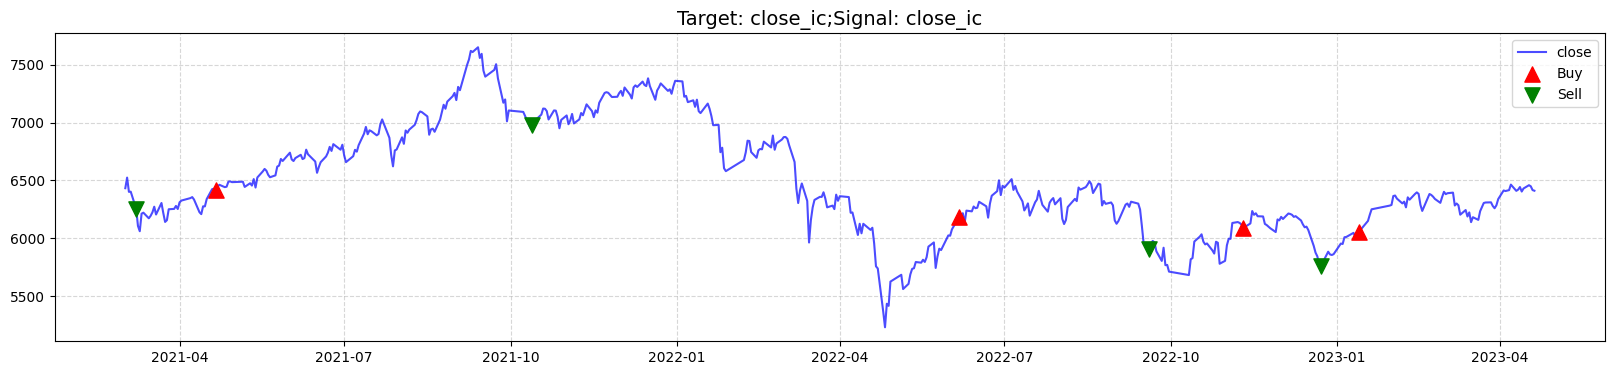

0.04101921443949381

In [197]:
macd_test(data, 'close_ic', 'close_ic',short_window = 50, long_window = 100, signal_window = 30, random_start = True, random_window = 500, plot = True)


--- 回测结果 ---
初始资金: $100,000.00
最终资产: $134,978.10
MACD策略总回报率: 34.98%
买入并持有策略总回报率: 4.62%


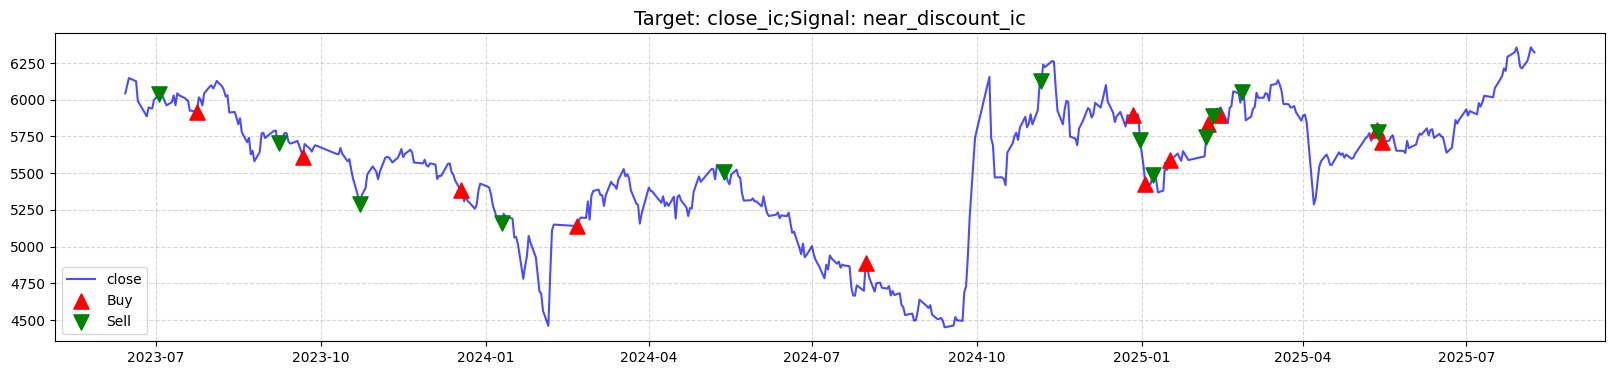

0.34978097007928155

In [205]:
macd_test(data, 'close_ic', 'near_discount_ic', short_window = 50, long_window = 100, signal_window = 30, random_start = True, random_window = 500, plot = True)

回测函数内置了随机起始点功能，每次调用时可以随机选择策略的起始点以获取更强的泛用性。

使用者可以通过调整MACD的参数、多次调用求平均值来观察更多对比。

可以看出，即使是对于最简单的MACD策略而言，以平稳数据作为信号源带来的信号具有更强的指导意义。

在此基础之上，我们还可以叠加基差率绝对幅度进行过滤，从而制作出更加有效的信号。

In [200]:
traditional = []
discount = []
for i in range(100):
    traditional.append(macd_test(data, 'close_ic', 'close_ic', short_window = 50, long_window = 100, signal_window = 30, random_start = True, random_window = 1000, plot = False))
    discount.append(macd_test(data, 'close_ic', 'near_discount_ic', short_window = 50, long_window = 100, signal_window = 30, random_start = True, random_window = 1000, plot = False))

traditional = np.array(traditional)
discount = np.array(discount)

print('100次随机回测')
print(f"价格MACD信号策略: 平均年化收益：{traditional.mean()/2:.2%}, 年化收益标准差：{traditional.std()/2:.2%}, Sharpe ratio {(traditional.mean()/2 - 0.03) / (traditional.std()/2):.2f}")
print(f"基差MACD信号策略: 平均年化收益：{discount.mean()/2:.2%}, 年化收益标准差：{discount.std()/2:.2%}, Sharpe ratio {(discount.mean()/2 - 0.03) / (discount.std()/2):.2f}")

价格MACD信号策略: 平均年化收益：-1.56%, 年化收益标准差：4.47%, Sharpe ratio -1.02
基差MACD信号策略: 平均年化收益：19.41%, 年化收益标准差：9.91%, Sharpe ratio 1.66
